In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import pylab
from matplotlib import cm

# Read in data

## Chondrite abundances

In [3]:
# Read the CSV file containing chondrite abundances
chondrite_abundances = pd.read_csv('Abunds_allnew_13jun2023.csv')

# Set the 'Element' column as the index of chondrite_abundances DataFrame
chondrite_abundances = chondrite_abundances.set_index('Element')

# Access the CI (Carbonaceous Chondrite) column from chondrite_abundances DataFrame
CI = chondrite_abundances.CI

## 2019 data

In [4]:
# Read the CSV files for data from 2019 (SQ, Ca, Si, and Mg)
data_2019_sq = pd.read_csv('2019_LA_CVdata_SQ_input.csv')
data_2019_ca = pd.read_csv('2019_LA_CVdata_Ca_input.csv')
data_2019_si = pd.read_csv('2019_LA_CVdata_Si_input.csv')
data_2019_mg = pd.read_csv('2019_LA_CVdata_Mg_input.csv')

In [5]:
# Create a list of DataFrame names
data_2019 = ['data_2019_sq', 'data_2019_ca', 'data_2019_si', 'data_2019_mg']

# Iterate over each DataFrame in the data_2019 list
for dataframe_name in data_2019:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [6]:
# Add a new column 'Tm/Lu' and 'Pr/Er' to identify type II clasts for each DataFrame in data_2019
for dname in data_2019:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## 2022 data

In [7]:
# Read the CSV files for data from 2022 (SQ, Ca, Si, Mg, and Al)
data_2022_sq = pd.read_csv('2022_June_SQ_input2.csv')
data_2022_ca = pd.read_csv('2022_June_Ca_input2.csv')
data_2022_si = pd.read_csv('2022_June_Si_input2.csv')
data_2022_mg = pd.read_csv('2022_June_Mg_input2.csv')
data_2022_al = pd.read_csv('2022_June_Al_input2.csv')

In [8]:
# Create a list of DataFrame names
data_2022 = ['data_2022_sq', 'data_2022_ca', 'data_2022_si', 'data_2022_mg', 'data_2022_al']

# Iterate over each DataFrame in the data_2022 list
for dataframe_name in data_2022:
    # Access the DataFrame by its name using eval()
    df = eval(dataframe_name)

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column has numeric values
        if pd.to_numeric(df[col], errors='coerce').dtype != object:
            # Replace negative numeric values with NaN
            df[col] = np.where(pd.to_numeric(df[col], errors='coerce') < 0, np.nan, df[col])

In [9]:
# Add a new column 'Tm/Lu' to identify type II clasts for each DataFrame in data_2022
for dname in data_2022:
    # Replace all zeros with NaNs in the DataFrame
    locals()[dname] = locals()[dname].replace(0, np.nan)
    
    # Calculate the 'Tm/Lu' ratio for each row in the DataFrame
    locals()[dname]['Tm/Lu'] = locals()[dname].apply(lambda row: (row['Tm169_ppm_mean'] / CI.Tm) / (row['Lu175_ppm_mean'] / CI.Lu), axis=1)
    
    #calculate the Pr/Er ratio for each row
    locals()[dname]['Pr/Er'] = locals()[dname].apply(lambda row: (row['Pr141_ppm_mean'] / CI.Pr) / (row['Er166_ppm_mean'] / CI.Er), axis=1)

## Partition Coefficents

In [10]:
#data from Gokce 2019, averages between ex #9 and #12

data = {
    'Element': ['La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th'],
    'D_i': [0.002, 0.004, 0.003, 0.013, 0.019, 0.054, 0.045, 0.003, 0.003, 0.004, 0.002, 0.028, 0.003, 0.004, 0.002], 
    'error': [0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.01, 0.001, 0.001, 0.001, 0.001, 0.01, 0.001, 0.001, 0.001]
    # Add more columns as needed
}
Di = pd.DataFrame(data)

In [11]:
ci = [CI.La, CI.Ce, CI.Eu, CI.Dy, CI.Ho, CI.Yb, CI.Ti, CI.Zr, CI.Nb, CI.Hf, CI.Ta, CI.Ca, CI.Sr, CI.Ba, CI.Th] #lodders 2021

In [12]:
elements = ['La', 'Ce', 'Eu', 'Dy', 'Ho', 'Yb', 'Ti', 'Zr', 'Nb', 'Hf', 'Ta', 'Ca', 'Sr', 'Ba', 'Th']

In [13]:
Di

,Element,D_i,error
0,La,0.002,0.001
1,Ce,0.004,0.001
2,Eu,0.003,0.001
3,Dy,0.013,0.001
4,Ho,0.019,0.001
5,Yb,0.054,0.002
6,Ti,0.045,0.010
7,Zr,0.003,0.001
8,Nb,0.003,0.001
9,Hf,0.004,0.001


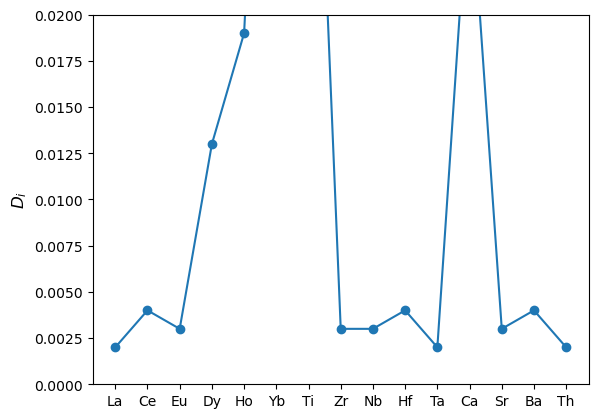

In [24]:
fig, ax = plt.subplots()

ax.scatter(Di.Element, Di.D_i)
ax.plot(Di.Element, Di.D_i)
ax.set_ylim([0,0.02])
ax.set_ylabel('$D_{i}$', fontsize=12);

## cleaning up data

In [14]:
columns = ['LA_Name', 'Met_Name', 'Object','Phase', 'Component', 
           'La139_ppm_mean', 'Ce140_ppm_mean', 'Eu153_ppm_mean',
           'Dy163_ppm_mean','Ho165_ppm_mean', 'Yb172_ppm_mean', 'Ti48_ppm_mean', 
           'Zr90_ppm_mean','Nb93_ppm_mean', 'Hf178_ppm_mean', 'Ta181_ppm_mean', 
           'Ca44_ppm_mean','Sr88_ppm_mean', 'Ba137_ppm_mean', 'Th232_ppm_mean']

In [15]:
olv2019 = data_2019_mg[(data_2019_mg.Phase=='olv') & (data_2019_mg.Component=='chondrule')][columns]
olv2022 = data_2022_mg[(data_2022_mg.Phase=='olv') & (data_2022_mg.Component=='chondrule')][columns]
olv = pd.concat([olv2019, olv2022])

In [16]:
gls2019 = data_2019_ca[(data_2019_ca.Phase=='gls') & (data_2019_ca.Component=='chondrule')][columns]
gls2022 = data_2022_ca[(data_2022_ca.Phase=='gls') & (data_2022_ca.Component=='chondrule')][columns]
gls = pd.concat([gls2019, gls2022])

# calculating averages and expected olivine values

In [17]:
gls_avg = gls.groupby(['Met_Name', 'Object']).mean()
gls_avg_ci = gls_avg.div(ci, axis=1)

/tmp/ipykernel_373/3525219804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gls_avg = gls.groupby(['Met_Name', 'Object']).mean()


In [18]:
olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()
olv_avg_meas_ci = olv_avg_meas.div(ci, axis=1)

/tmp/ipykernel_373/647802435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  olv_avg_meas = olv.groupby(['Met_Name', 'Object']).mean()


In [19]:
olv_avg_calc_ci = gls_avg_ci.mul(np.array(Di.D_i), axis=1)

In [20]:
chondrules = gls_avg.index

/tmp/ipykernel_373/3849104210.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,4))


Error in callback <function _draw_all_if_interactive at 0x7fc036aaa170> (for post_execute):


KeyboardInterrupt: 

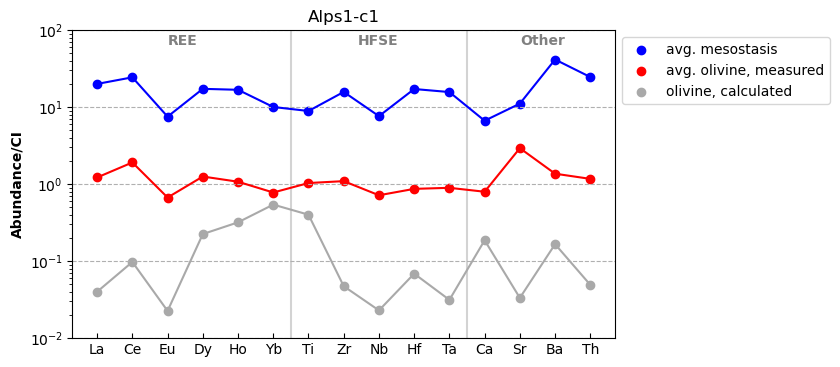

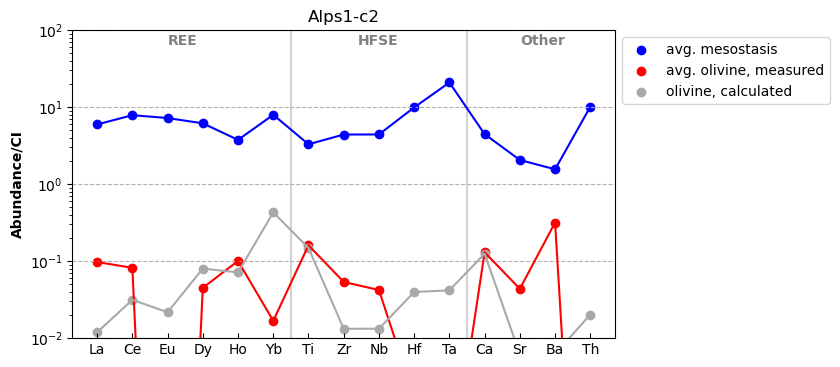

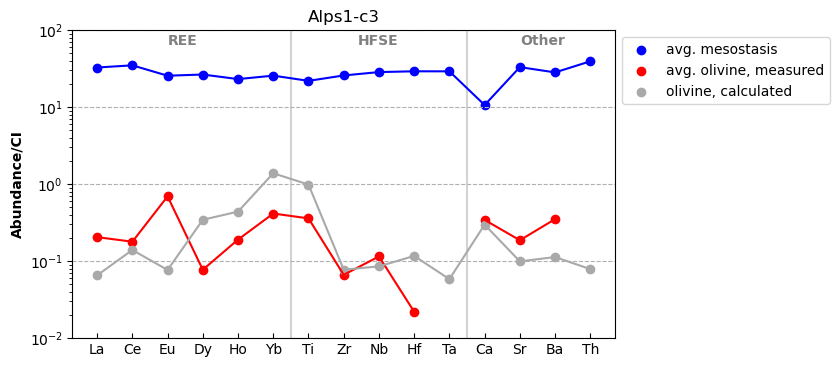

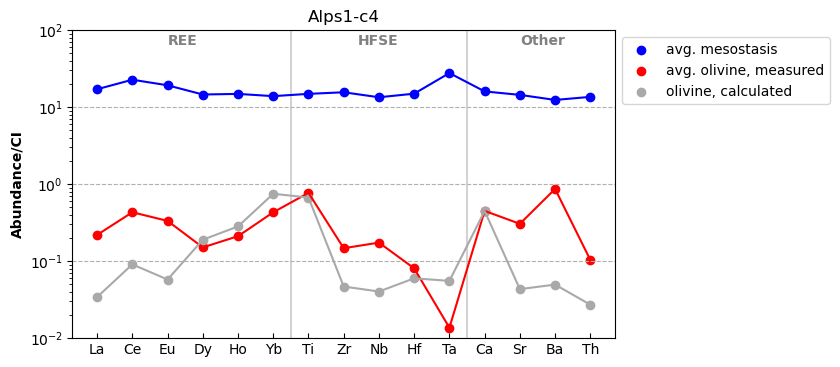

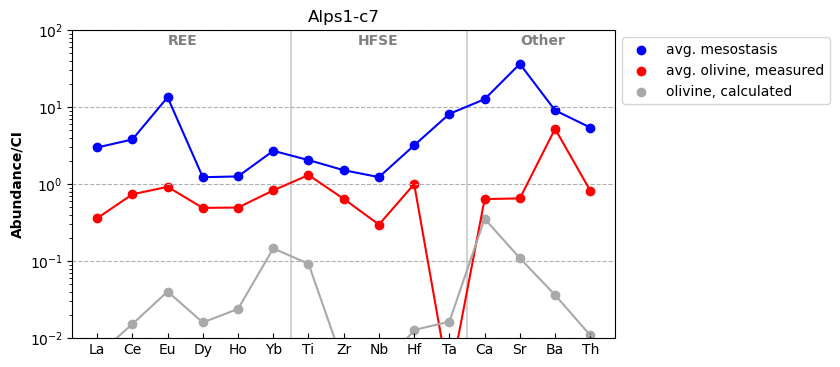

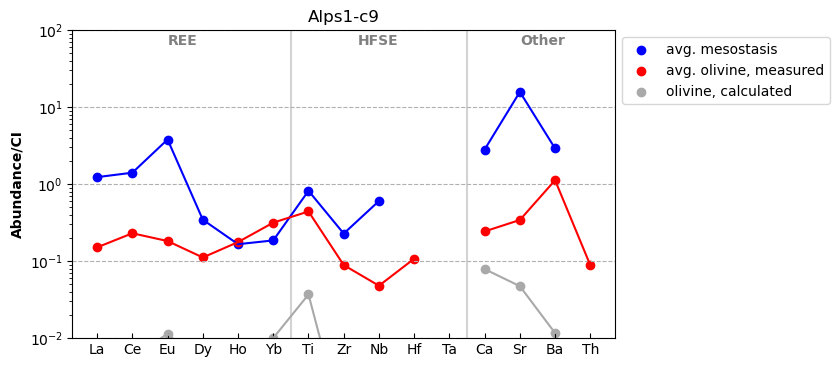

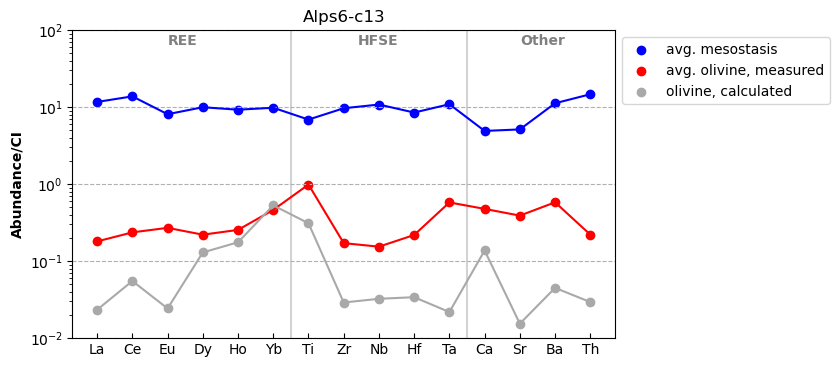

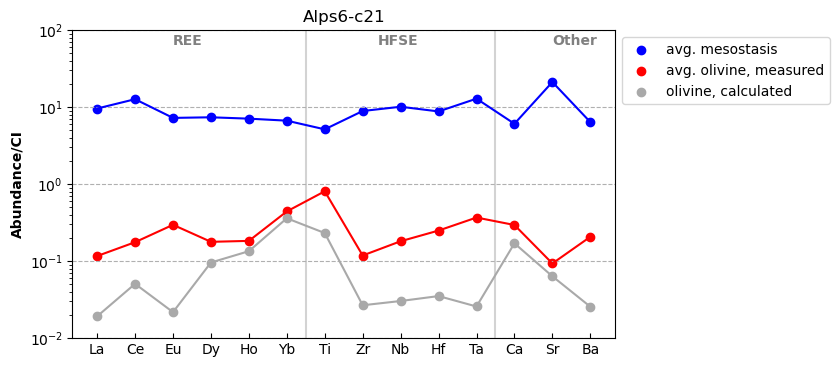

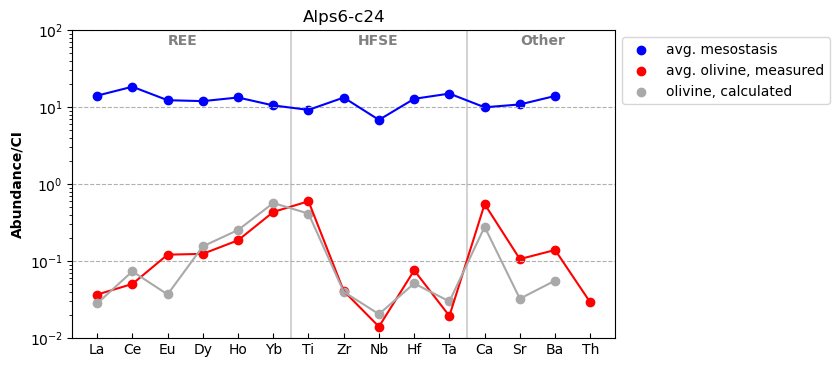

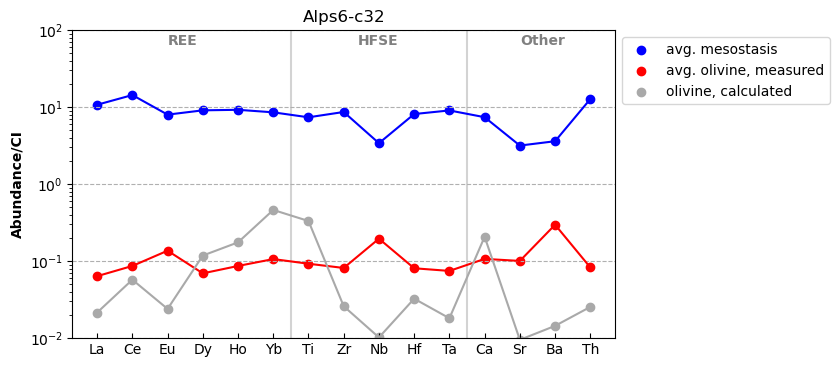

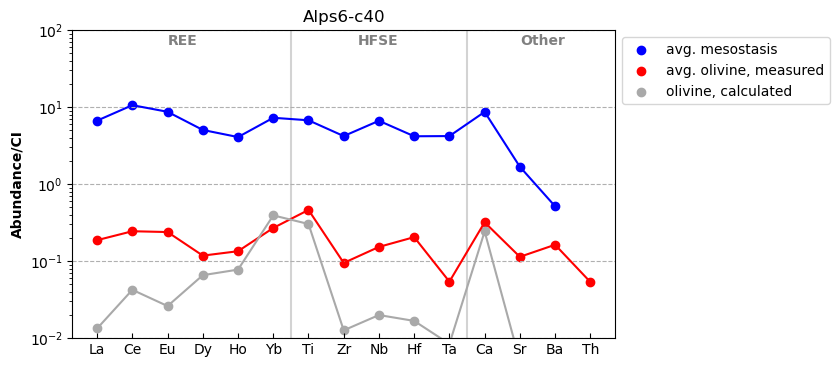

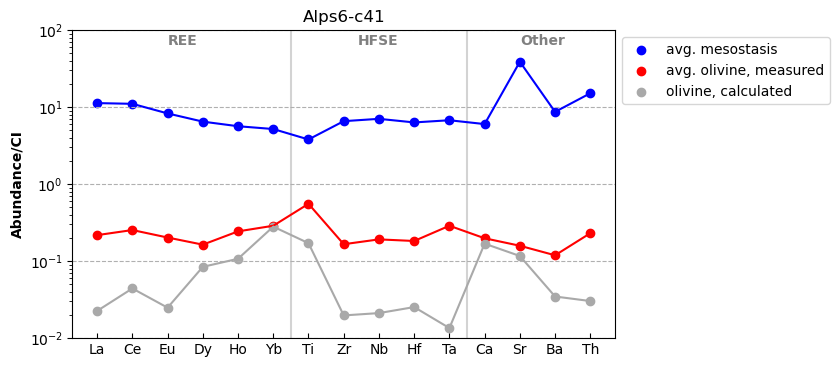

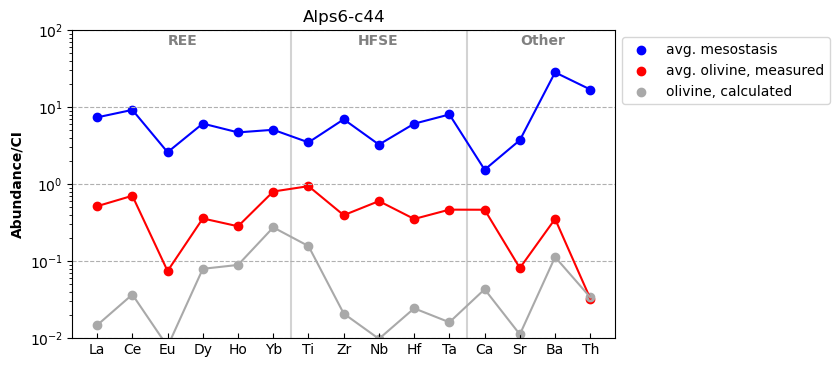

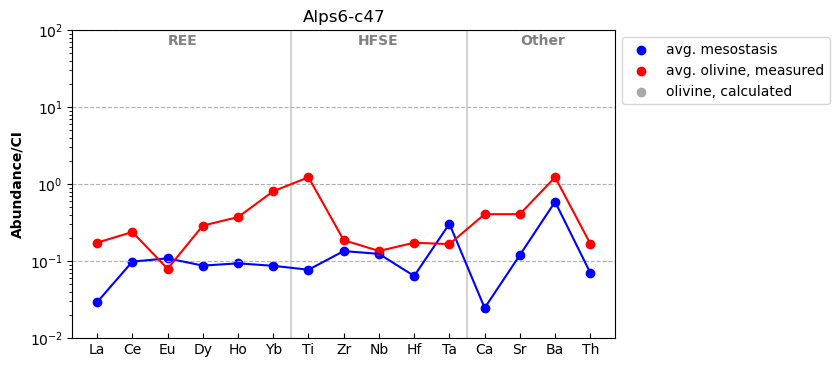

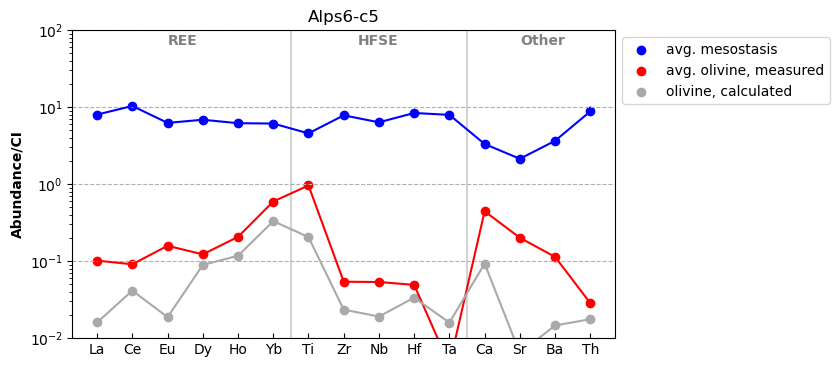

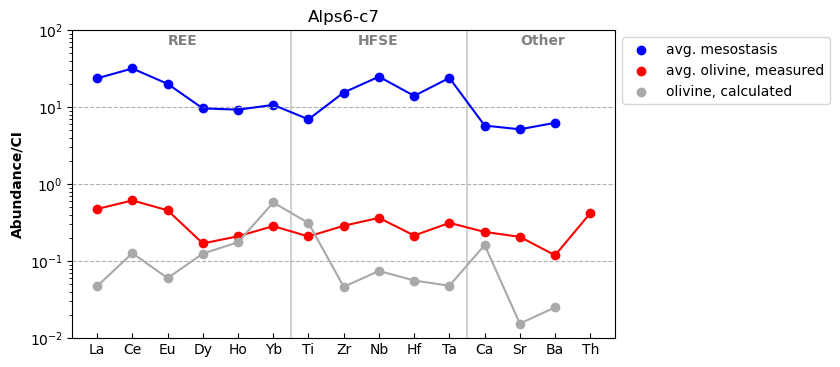

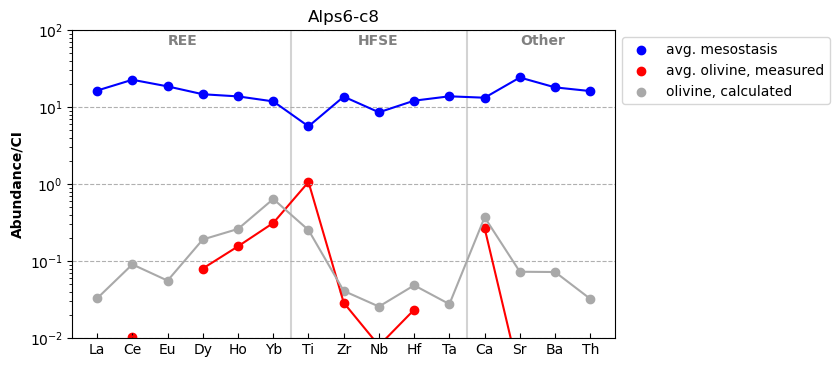

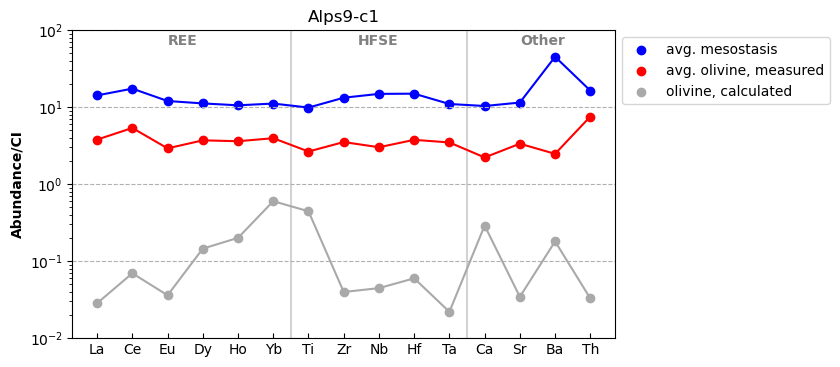

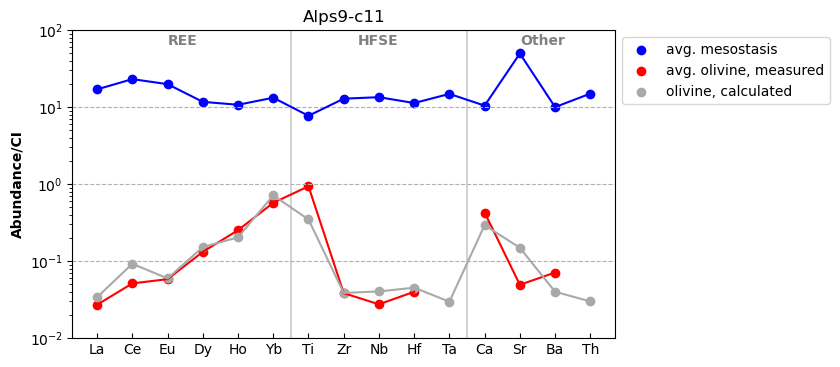

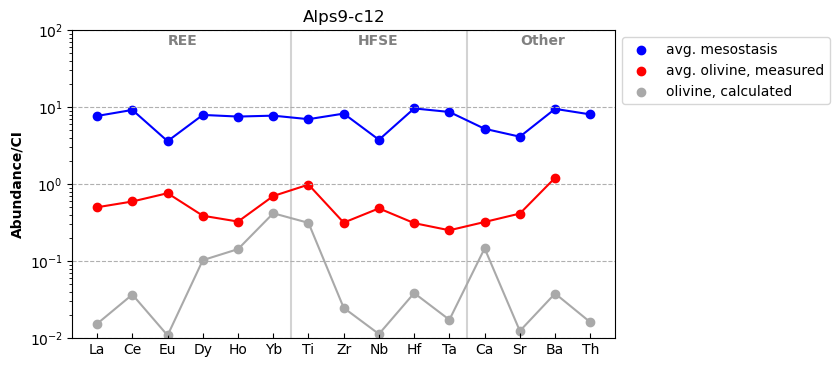

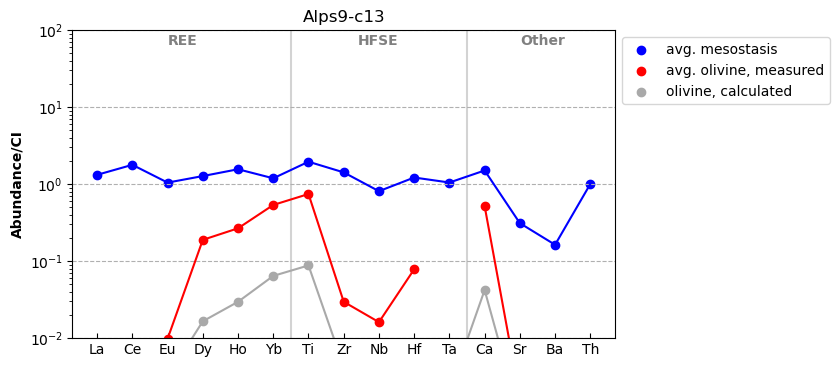

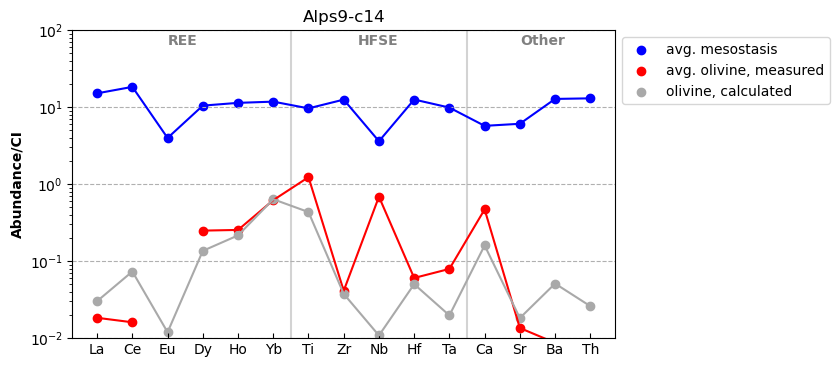

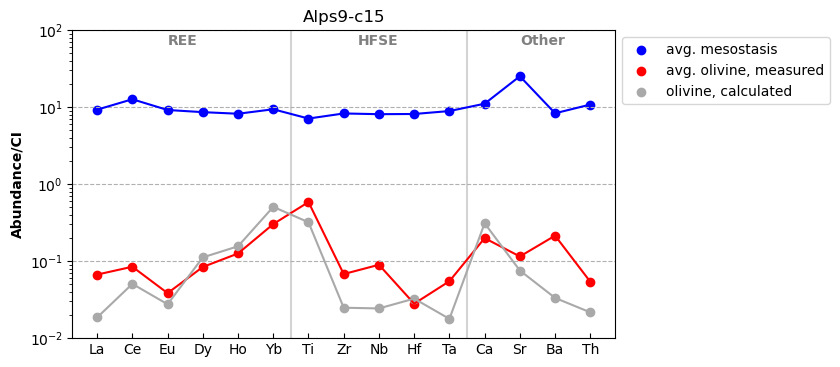

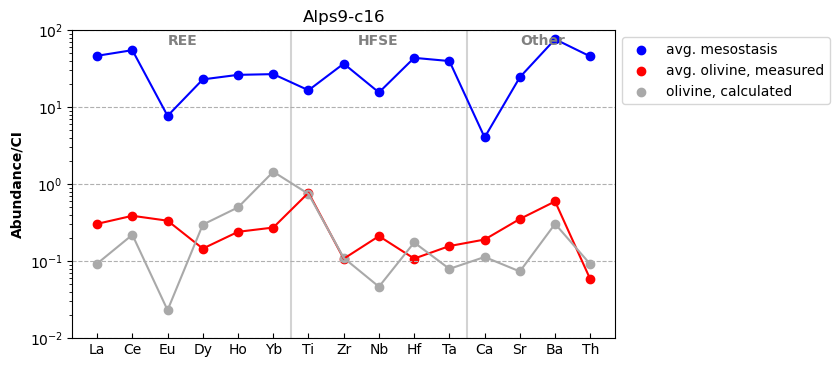

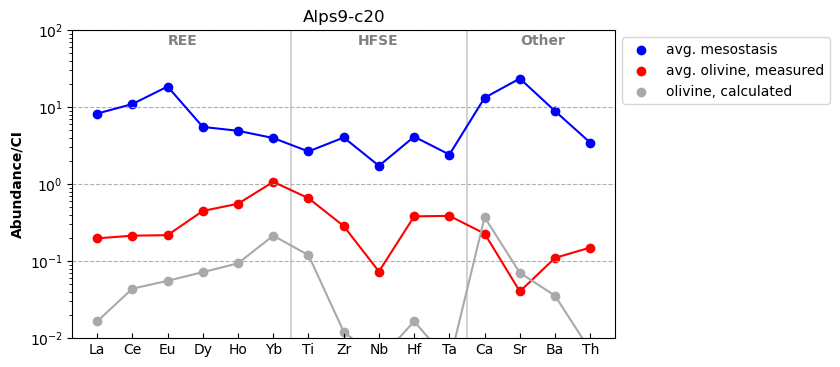

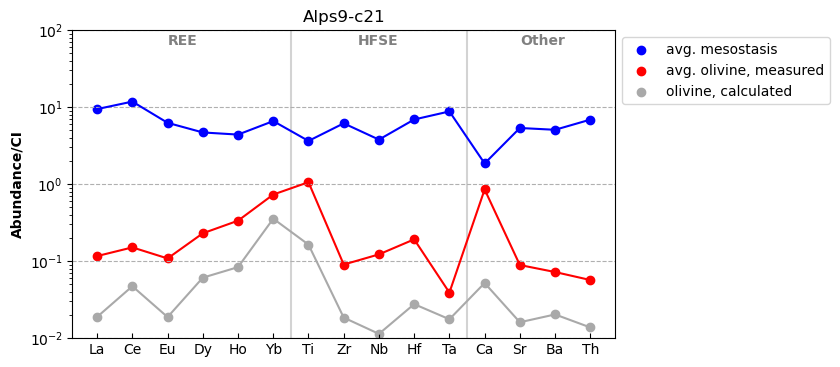

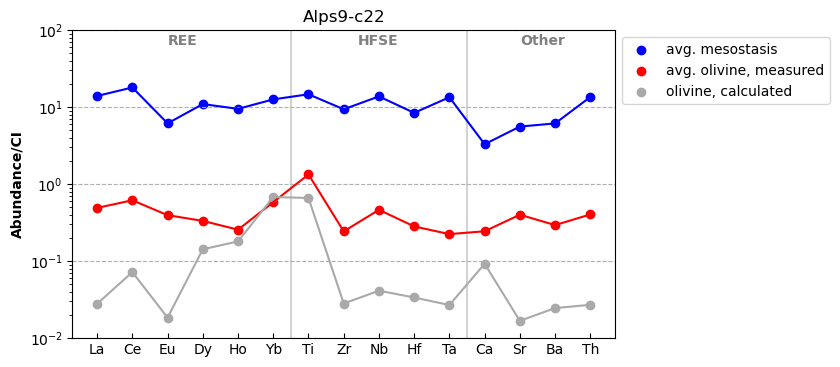

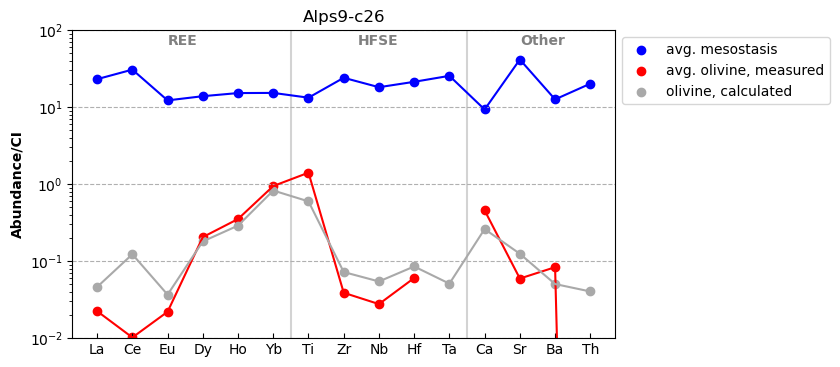

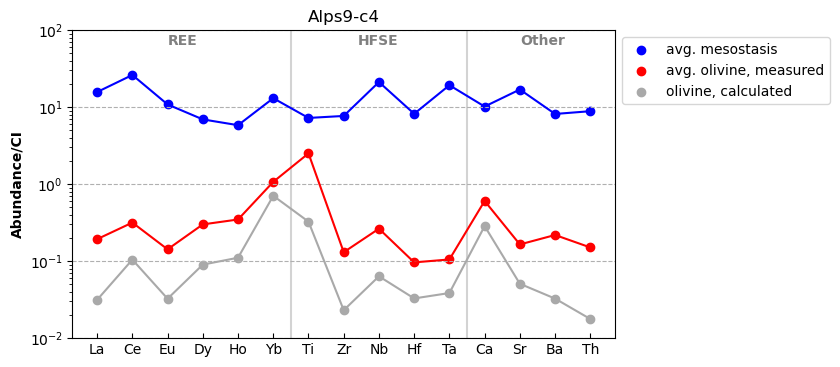

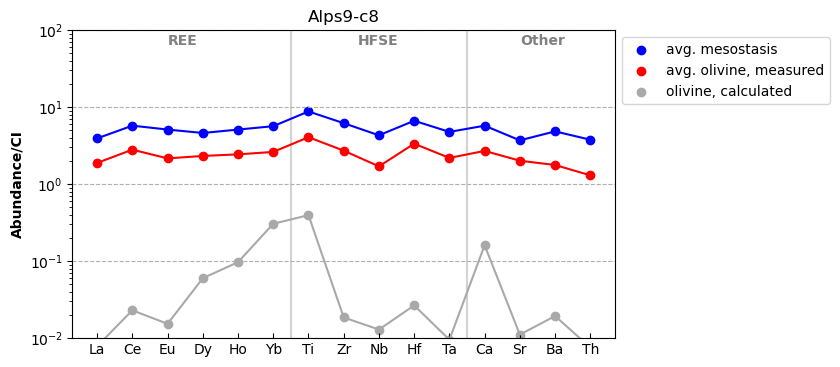

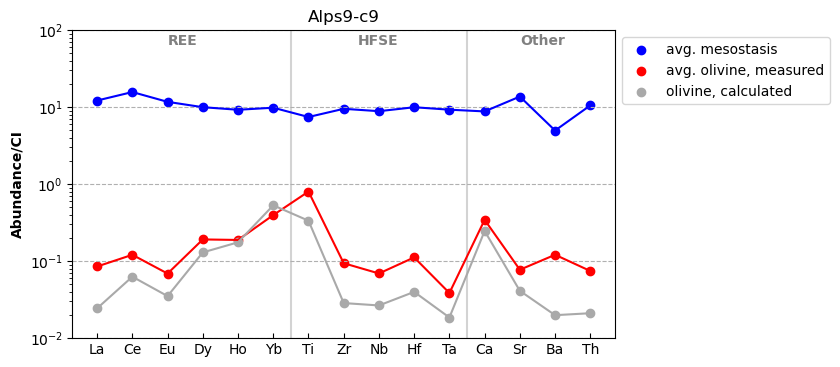

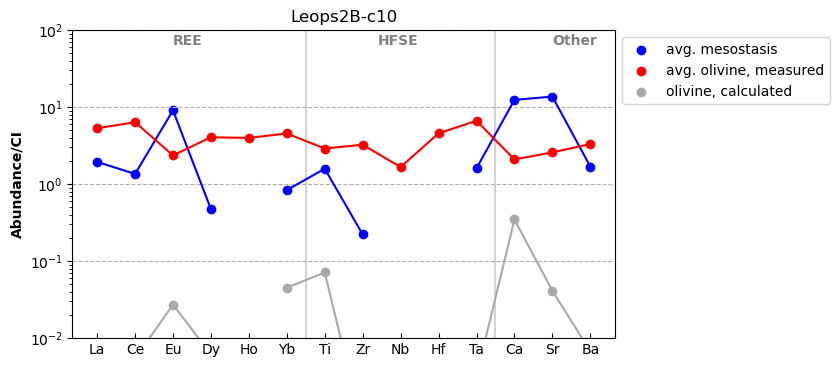

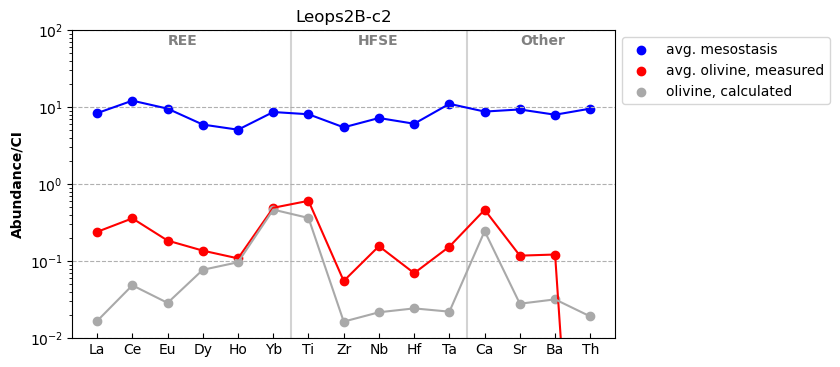

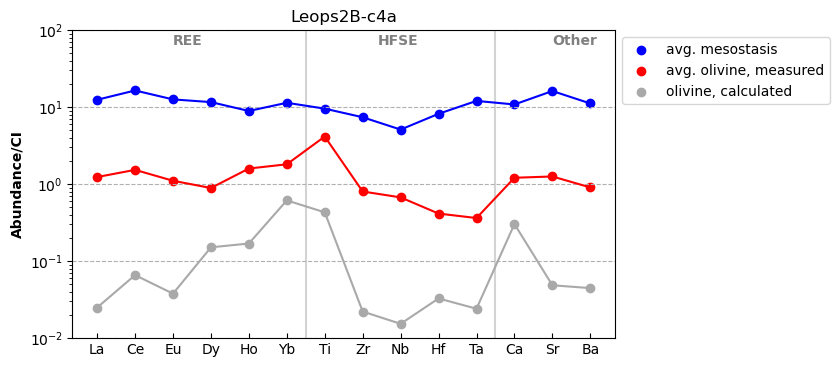

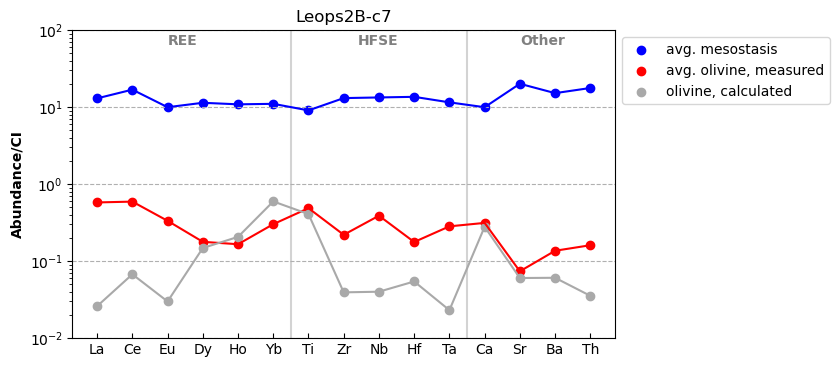

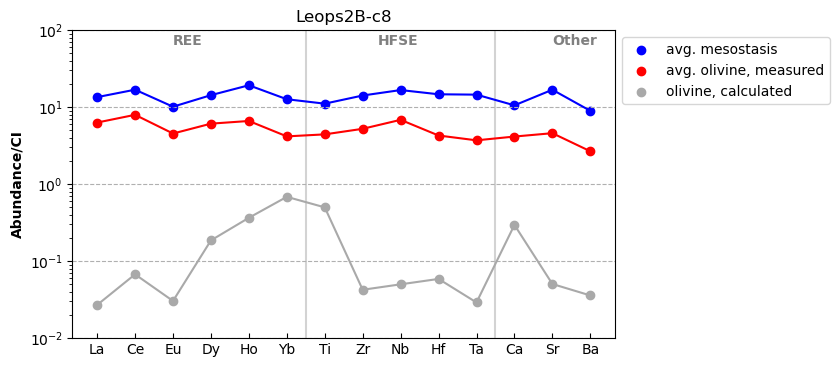

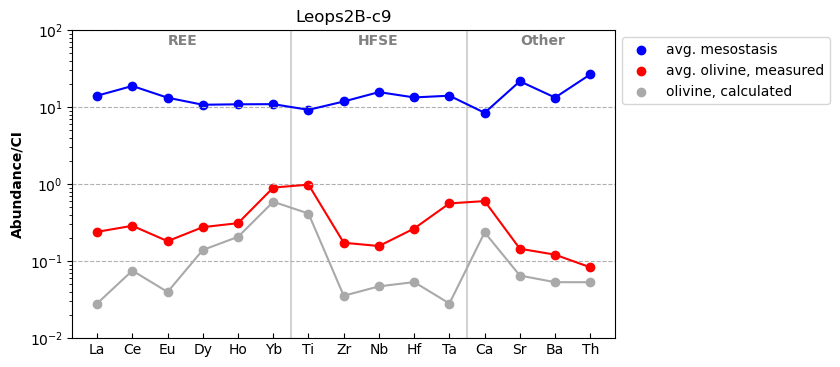

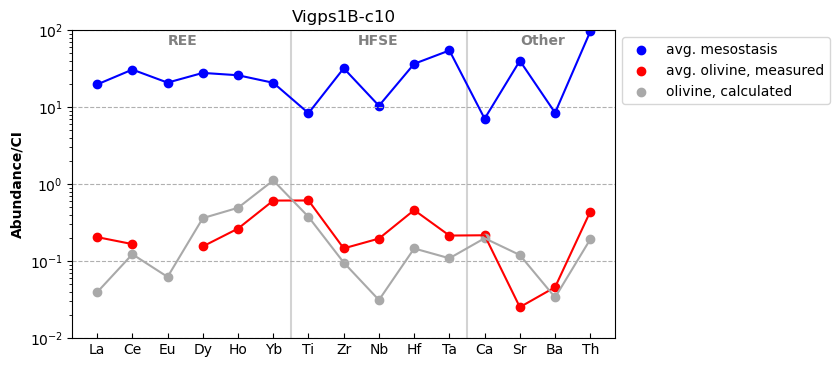

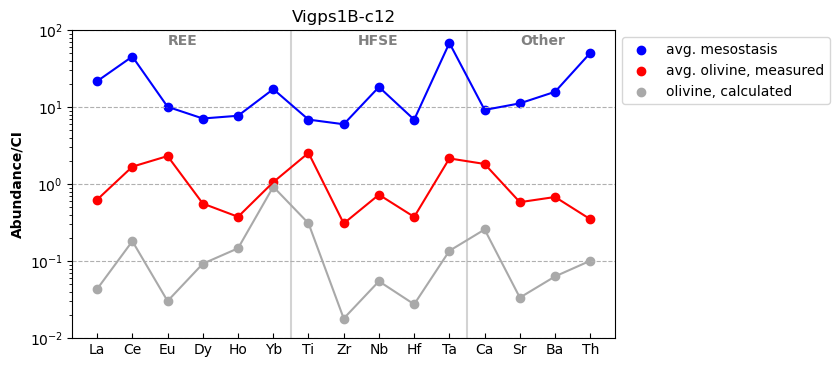

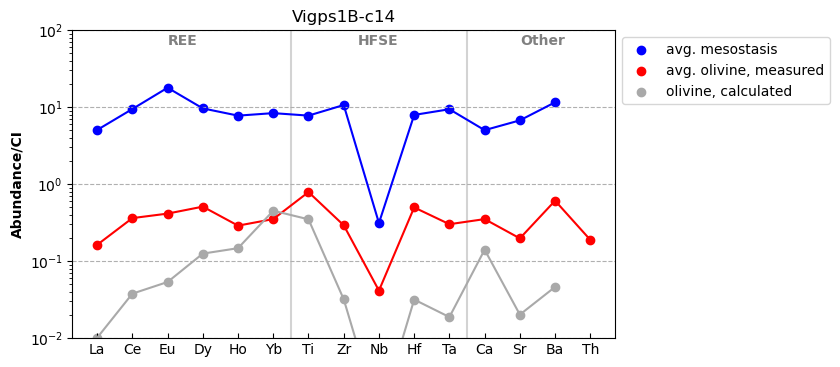

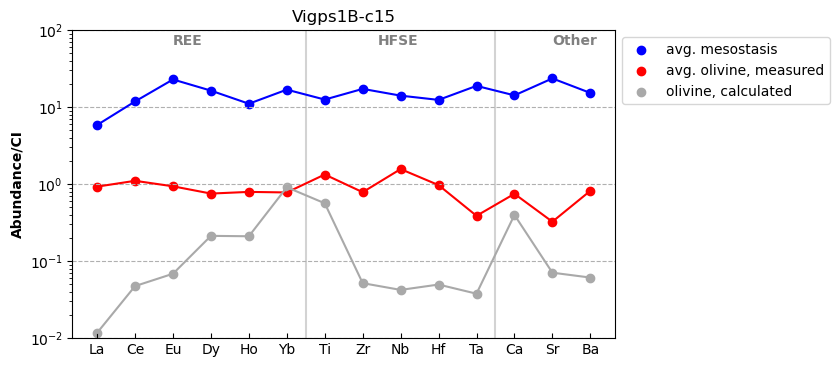

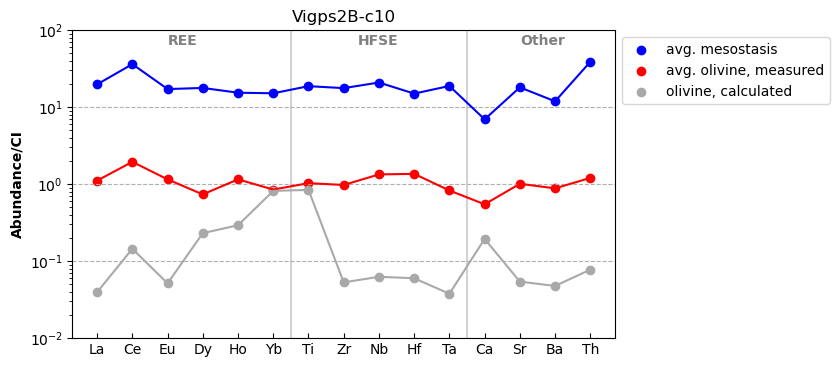

In [21]:
for i in range(0, len(chondrules)):
    if chondrules[i] in olv_avg_meas.index:
        #setting up plot
        fig, ax = plt.subplots(figsize=(7,4))

        ax.set_ylabel('Abundance/CI', fontweight='bold')
        ax.set_yscale("log") 
        ax.set_ylim([10**-2, 10**2])
        ax.grid(axis='y', linestyle='--', zorder=0)
        ax.set_title(chondrules[i][0]+'-'+chondrules[i][1])

        ax.tick_params(axis='x', direction='in')
        
        ax.axvline(x=5.5, color='lightgrey', zorder=0)
        ax.axvline(x=10.5, color='lightgrey', zorder=0)
        
        ax.text(2, 65, 'REE', color='grey', fontweight='bold')
        ax.text(7.4, 65, 'HFSE', color='grey', fontweight='bold')
        ax.text(12, 65, 'Other', color='grey', fontweight='bold')

        #plotting
        #glass
        ax.scatter(elements, gls_avg_ci.loc[chondrules[i]], color='blue', label='avg. mesostasis')
        ax.plot(elements, gls_avg_ci.loc[chondrules[i]], color='blue')

        #olivine measured
        ax.scatter(elements, olv_avg_meas_ci.loc[chondrules[i]], color='red', label='avg. olivine, measured')
        ax.plot(elements, olv_avg_meas_ci.loc[chondrules[i]], color='red')

        #olivine calculated
        ax.errorbar(elements, olv_avg_calc_ci.loc[chondrules[i]]
        ax.scatter(elements, olv_avg_calc_ci.loc[chondrules[i]], color='darkgrey', label='olivine, calculated')
        ax.plot(elements, olv_avg_calc_ci.loc[chondrules[i]], color='darkgrey')

        ax.legend(bbox_to_anchor=(1, 1))